In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from collections import Counter

In [2]:
data_path = '../../data/lda_jsd_toprev_conlen/'

In [3]:
fandom_list = [i for i in os.listdir(data_path) if 'tsv' in i]

### Time dist

In [4]:
times = Counter()
for fandom in fandom_list:
    df = pd.read_csv(data_path + fandom, sep = '\t')
    times += Counter(df.PublishDate.str[:7].tolist())

In [5]:
labels = sorted(times.keys())[:-1]

In [6]:
agg = 0
for l in labels:
    if int(l[0:4]) < 2009:
        agg += times[l]
labels = [l for l in labels if int(l[0:4]) >=  2009]

In [7]:
labels.remove('2016-06')

ValueError: list.remove(x): x not in list

In [8]:
x = np.arange(1, len(labels) +1)
y = [times[k] for k in labels]

In [9]:
labels.insert(0,'Pre-2009')

In [10]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89])

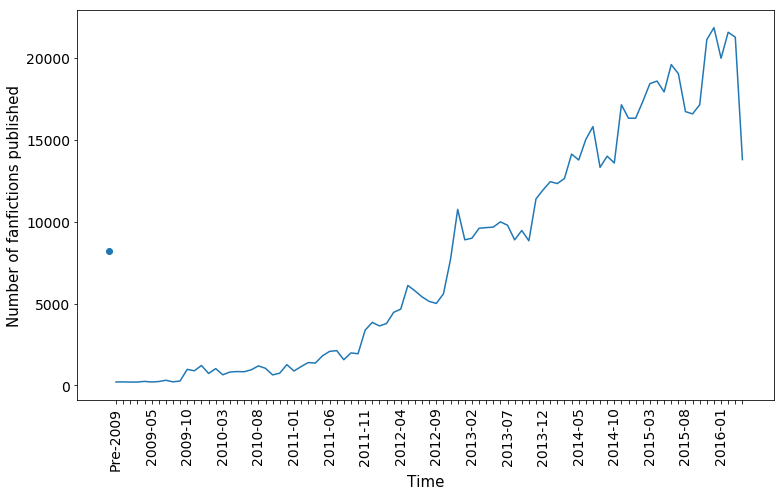

In [11]:
labels_f = [l if labels.index(l)%5==0 else '' for l in labels ]
fig, ax = plt.subplots(figsize=[11,7])
plt.scatter(0, agg)
plt.plot(x, y)
plt.xticks(x, labels_f, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Number of fanfictions published",fontsize=15)
# plt.xlim(-1,90)
start_idx = labels.index('2010-01')
end_idx = labels.index('2016-05')
# x_zoom = np.arange(0, end_idx-start_idx+1)
# y_zoom = [times[k] for k in labels[start_idx:end_idx+1]]
# x_zoom_labels = labels[start_idx:end_idx+1]
# x_zoom_labels_f = [l if x_zoom_labels.index(l)%3==0 else '' for l in x_zoom_labels ] 
# sub_axes = plt.axes([.3, .4, .4, .4]) 
# sub_axes.plot(x_zoom, y_zoom) 
# sub_axes.set_xticks(x_zoom)
# sub_axes.set_xticklabels(x_zoom_labels_f, rotation=90)

plt.tight_layout()
plt.savefig("fic_time_dist.pdf", format="pdf")

### Plot length dist

In [28]:
len_list = []
for fandom in fandom_list:
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
    df['ave_len'] = df.Words/df.Chapters
    df = df.dropna(subset=['ave_len'])
    len_list.extend(df['ave_len'].tolist())

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
len_list = [elem for elem in len_list if not np.isnan(elem)]

len_list = [elem for elem in len_list if not np.isinf(elem)]

len_list = [elem for elem in len_list if elem > 0]

In [30]:
sorted(len_list)[-20:]

[87014.0,
 87144.0,
 87365.0,
 87839.0,
 88689.0,
 89573.0,
 90368.0,
 97675.0,
 101221.0,
 102075.0,
 102075.0,
 106694.0,
 111581.0,
 128942.0,
 157817.0,
 184597.0,
 216450.0,
 323693.0,
 323693.0,
 576696.0]

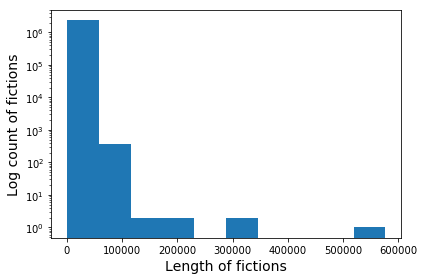

In [36]:
plt.hist((len_list), log=True)
plt.xlabel("Length of fictions",fontsize=14)
plt.ylabel("Log count of fictions",fontsize=14)
plt.tight_layout()
plt.savefig("fic_len_dist.pdf", format='pdf')

In [40]:
2*np.e**10

44052.93158961341

### Kudos

In [37]:
kudos_list = []
for fandom in fandom_list:
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
    df['ave_kudos'] = df.Kudos/df.Chapters
    df = df.dropna(subset=['ave_kudos'])
    kudos_list.extend(df['ave_kudos'].tolist())

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
kudos_list = [elem for elem in kudos_list if not np.isnan(elem) and not np.isinf(elem)]
kudos_list = [elem for elem in kudos_list if elem > 0]

NameError: name 'x1' is not defined

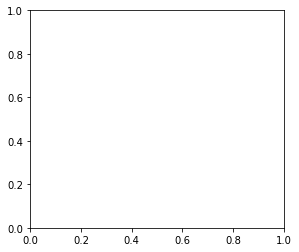

In [39]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)

Y = np.log10(sorted(x1))
N = len(Y)
X = np.logspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Kudos')
plt.xlabel('Logged Kudos',fontsize = '14')
plt.ylabel("Logged Number of fictions", fontsize='14')

plt.subplot(1, 2, 2)

Y = np.log10(sorted(x2))
N = len(Y)
X = np.logspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Hits')
plt.xlabel('Logged Hits',fontsize = '14')
plt.ylabel("Logged Number of fictions", fontsize='14')
plt.savefig('kudos_hits_dist.png', type='png')



In [ ]:
len(kudos_list)

In [ ]:
np.log(0.01)

(array([  6.82800000e+03,   4.33130000e+04,   1.70624000e+05,
          5.13400000e+05,   7.99294000e+05,   5.92785000e+05,
          1.83801000e+05,   2.35740000e+04,   1.44100000e+03,
          1.50000000e+01]),
 array([ -4.60517019,  -3.09143021,  -1.57769024,  -0.06395027,
          1.4497897 ,   2.96352968,   4.47726965,   5.99100962,
          7.50474959,   9.01848956,  10.53222954]),
 <a list of 10 Patch objects>)

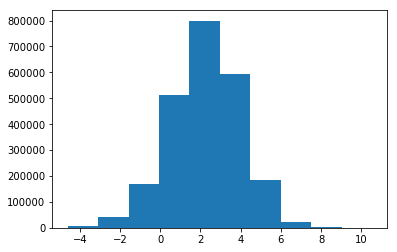

In [14]:
plt.hist(np.log(kudos_list))

In [40]:
# TODO: plot CDF of movie ratings. 
X = movie_df['Rating'].order()
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y)

NameError: name 'movie_df' is not defined

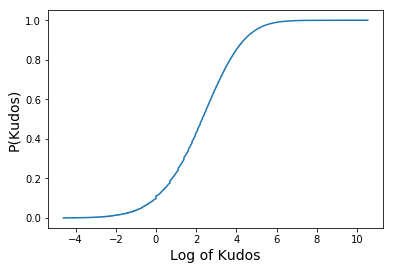

In [44]:
X = np.log(sorted(kudos_list))
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Kudos')
plt.ylabel('P(Kudos)',fontsize = '14')
plt.xlabel("Log of Kudos", fontsize='14')
plt.savefig('kudos_dist.pdf', type='pdf')


### Tag set length

In [13]:
def calc_tag_len(cell):
    return len(cell.split(','))

In [15]:
df = df.dropna(subset = ['AdditionalTags'])

In [16]:
df['tag_set_len'] = df.AdditionalTags.apply(lambda cell: len(cell.split(',')))

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
df.head()

,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,ChapterIndex,Chapters,Characters,Comments,CompleteDate,...,Notes,PublishDate,Rating,Relationship,Summary,Title,URL,UpdateDate,Words,tag_set_len
0,"Plot What Plot/Porn Without Plot, Vaginal Fing...",Underage,MorganasCrow,0,F/F,NaN,1,"Morgana (Merlin), Morgause (Merlin)",0,2015-06-16,...,NaN,2015-06-16,Explicit,Morcest,Morgana and Morgause enjoy wild games.,What The Fag You Think You\'re Doing?,http://archiveofourown.org/works/4146375?view_...,NaN,933.0,14
1,"blind!Arthur, Blindness, Minor Violence, Impli...",Creator Chose Not To Use Archive Warnings,SoCanonItHurts,4,M/M,NaN,1,"Merlin (Merlin), Arthur Pendragon (Merlin), Gw...",0,NaN,...,"Warning: I know nothing about being blind, all...",2016-04-17,Mature,"Merlin/Arthur Pendragon, Gwaine/Merlin (Merlin...",Merlin has a wonderful night with a mysteriou...,Obstacles in Our Way,http://archiveofourown.org/works/6575791?view_...,2016-04-16,1317.0,4
2,"Alternate Universe - Post-Apocalypse, Summer P...",No Archive Warnings Apply,Cyn,1,M/M,NaN,1,"Merlin (Merlin), Arthur Pendragon (Merlin)",0,2014-12-19,...,Written for the third round at Summer Pornatho...,2014-12-19,Explicit,Merlin/Arthur Pendragon,Arthur distracts Merlin in an old ruined library.,"The Stacks (Best Place for Sex, Even if They D...",http://archiveofourown.org/works/2797889?view_...,NaN,745.0,3
4,"Alternate Universe - Dystopia, Summer Pornatho...",No Archive Warnings Apply,Clea2011,0,F/M,NaN,1,"Elena (Merlin), Gwaine (Merlin), Leon (Merlin)",6,2015-08-30,...,"This was my Summer Pornathon week 4 entry, for...",2015-08-30,Mature,Elena/Gwaine (Merlin),The observatory was in darkness. It was where ...,Forbidden,http://archiveofourown.org/works/4688852?view_...,NaN,750.0,2
6,"Angst, Pining, Unrequited Love","No Archive Warnings Apply, Creator Chose Not T...",Ctiy1007,0,F/MGenM/MOther,NaN,1,"Arthur Pendragon, Guinevere (Arthurian), Merli...",1,2015-10-23,...,NaN,2015-10-23,General Audiences,"Gwen/Arthur Pendragon (Merlin), Gwen/Lancelot ...","He watches them, King Arthur and the Queen to ...",Most Times Love Hurts,http://archiveofourown.org/works/248519,NaN,162.0,3


In [18]:
tag_len_list = []
for fandom in fandom_list:
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
    df = df.dropna(subset = ['AdditionalTags'])
    df['tag_set_len'] = df.AdditionalTags.apply(lambda cell: len(cell.split(',')))
    tag_len_list.extend(df['tag_set_len'].tolist())

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
len(tag_len_list)

2090009

In [20]:
tag_len_list[0:10]

[14, 4, 3, 2, 3, 4, 5, 3, 5, 13]

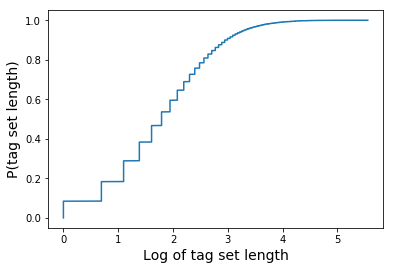

In [48]:
X = np.log(sorted(tag_len_list))
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Kudos')
plt.ylabel('P(tag set length)',fontsize = '14')
plt.xlabel("Log of tag set length", fontsize='14')
plt.savefig('tag_len_dist.pdf', type='pdf')
